## Oliwia Paliwoda, Dorota Mockiewicz - WDUM Klasyfikacja gatunków pingwinów

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("penguins_size.csv")
penguins = df.sample(344).reset_index(drop=True) #pobieranie danych
print(penguins)

       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       Gentoo  Biscoe              50.4             15.3              224.0   
1       Gentoo  Biscoe              49.1             14.8              220.0   
2       Gentoo  Biscoe              47.7             15.0              216.0   
3       Gentoo  Biscoe              48.2             15.6              221.0   
4       Gentoo  Biscoe              49.6             16.0              225.0   
..         ...     ...               ...              ...                ...   
339     Gentoo  Biscoe              46.7             15.3              219.0   
340     Adelie   Dream              37.3             16.8              192.0   
341     Gentoo  Biscoe              53.4             15.8              219.0   
342  Chinstrap   Dream              40.9             16.6              187.0   
343     Adelie   Dream              40.8             18.9              208.0   

     body_mass_g     sex  
0         55

In [54]:
print(pd.DataFrame.info(penguins)) #wyswietlanie informacji
print()
print(pd.DataFrame.describe(penguins))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000

## Czyszczenie danych

In [55]:
null_values = penguins[penguins.isnull().any(axis=1)]
print(null_values)  #sprawdzam czy istnieja rekordy z wartosciami null

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
39   Adelie  Torgersen              34.1             18.1              193.0   
52   Gentoo     Biscoe               NaN              NaN                NaN   
65   Adelie      Dream              37.5             18.9              179.0   
115  Adelie  Torgersen              37.8             17.1              186.0   
149  Gentoo     Biscoe              46.2             14.4              214.0   
169  Gentoo     Biscoe              44.5             14.3              216.0   
194  Adelie  Torgersen               NaN              NaN                NaN   
196  Gentoo     Biscoe              47.3             13.8              216.0   
275  Adelie  Torgersen              37.8             17.3              180.0   
293  Adelie  Torgersen              42.0             20.2              190.0   

     body_mass_g  sex  
39        3475.0  NaN  
52           NaN  NaN  
65        2975.0  NaN  
115       3300.0  NaN  

In [56]:
# Obliczenie średnich dla poszczególnych kolumn numerycznych w zależności od gatunku
means_by_species = penguins.groupby('species').mean()

# Funkcja do uzupełnienia brakujących wartości w kolumnach numerycznych za pomocą średnich dla danego gatunku
def impute_numeric_values(row):
    species = row['species']
    if pd.isnull(row['culmen_length_mm']):
        row['culmen_length_mm'] = means_by_species.loc[species, 'culmen_length_mm']
    if pd.isnull(row['culmen_depth_mm']):
        row['culmen_depth_mm'] = means_by_species.loc[species, 'culmen_depth_mm']
    if pd.isnull(row['flipper_length_mm']):
        row['flipper_length_mm'] = means_by_species.loc[species, 'flipper_length_mm']
    if pd.isnull(row['body_mass_g']):
        row['body_mass_g'] = means_by_species.loc[species, 'body_mass_g']
    return row

penguins = penguins.apply(impute_numeric_values, axis=1)

# Zastąpienie brakujących wartości w kolumnie 'sex' najczęściej występującą wartością dla danego gatunku
most_frequent_sex = penguins['sex'].mode()[0]
penguins['sex'] = penguins['sex'].fillna(most_frequent_sex)

print(penguins)

<ipython-input-56-159c12700c9e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_by_species = penguins.groupby('species').mean()


       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       Gentoo  Biscoe              50.4             15.3              224.0   
1       Gentoo  Biscoe              49.1             14.8              220.0   
2       Gentoo  Biscoe              47.7             15.0              216.0   
3       Gentoo  Biscoe              48.2             15.6              221.0   
4       Gentoo  Biscoe              49.6             16.0              225.0   
..         ...     ...               ...              ...                ...   
339     Gentoo  Biscoe              46.7             15.3              219.0   
340     Adelie   Dream              37.3             16.8              192.0   
341     Gentoo  Biscoe              53.4             15.8              219.0   
342  Chinstrap   Dream              40.9             16.6              187.0   
343     Adelie   Dream              40.8             18.9              208.0   

     body_mass_g     sex  
0         55

In [57]:
null_values = penguins[penguins.isnull().any(axis=1)]
print(null_values)  #sprawdzam ponownie czy istnieja rekordy z wartosciami null

Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [58]:
#sprawdzenie, czy kolumny numeryczne zawierają tylko oczekiwane dane

print(penguins['species'].value_counts())
print()
print(penguins['island'].value_counts())
print()
print(penguins['sex'].value_counts()) # <-- znaleziono kropkę

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64


In [59]:
print(penguins[penguins['sex'] == '.']) #szukanie rekordu z kropką

   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
36  Gentoo  Biscoe              44.5             15.7              217.0   

    body_mass_g sex  
36       4875.0   .  


In [60]:
penguins = penguins.drop(36) #usuniecie rekordu z kropką

In [61]:
print(penguins['sex'].value_counts())

MALE      178
FEMALE    165
Name: sex, dtype: int64


In [62]:
contains_whitespace = penguins.applymap(lambda x: isinstance(x, str) and x.isspace()).any().any() #sprawdzenie czy dataset nie zawiera znaków białych

print(contains_whitespace)

False


## Eksploracyjna analiza danych

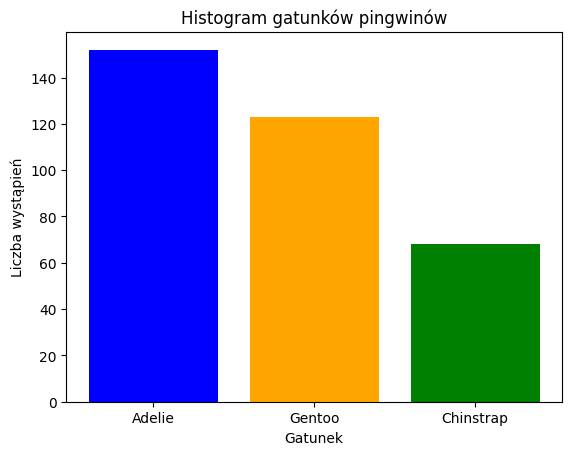

In [64]:
species_counts = penguins['species'].value_counts() #liczenie wartości w kolumnie binomial

plt.bar(species_counts.index, species_counts.values, color=['blue', 'orange', 'green'])
plt.title('Histogram gatunków pingwinów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba wystąpień')
plt.show()

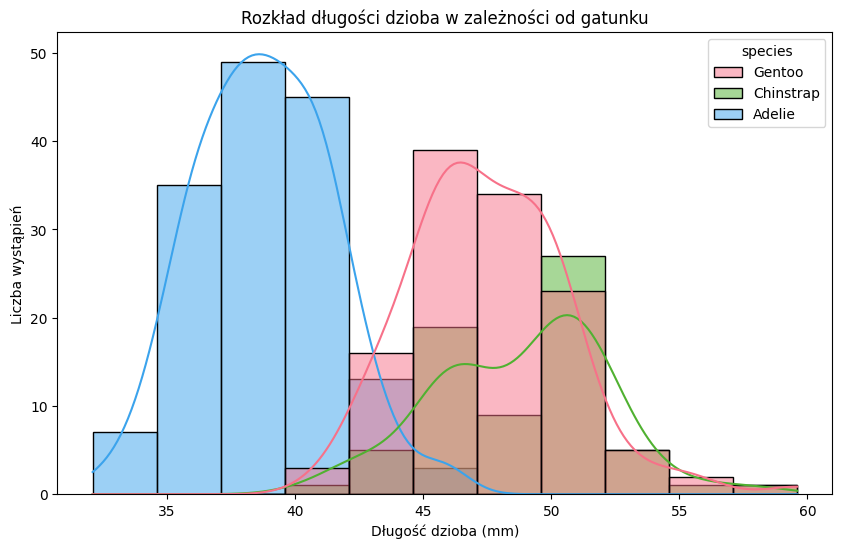

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='culmen_length_mm', hue='species', kde=True, palette='husl')
plt.title('Rozkład długości dzioba w zależności od gatunku')
plt.xlabel('Długość dzioba (mm)')
plt.ylabel('Liczba wystąpień')
plt.show()

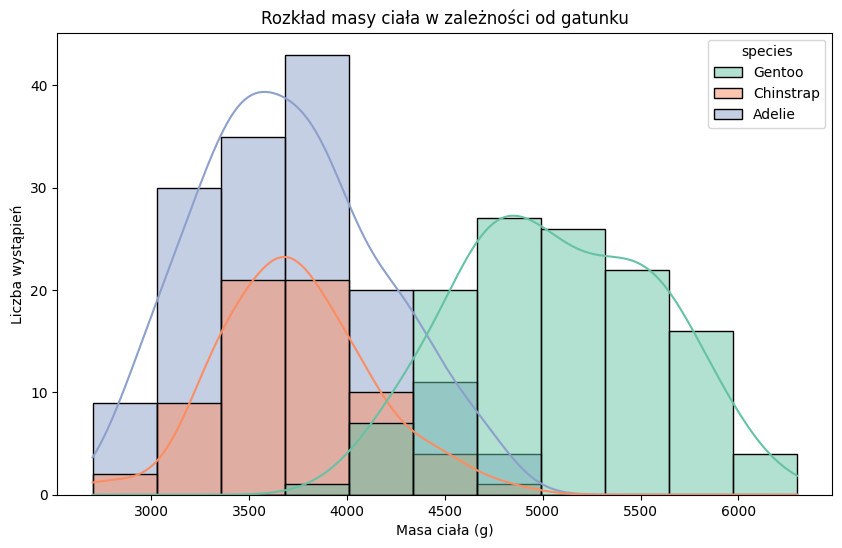

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='body_mass_g', hue='species', kde=True, palette='Set2')
plt.title('Rozkład masy ciała w zależności od gatunku')
plt.xlabel('Masa ciała (g)')
plt.ylabel('Liczba wystąpień')
plt.show()

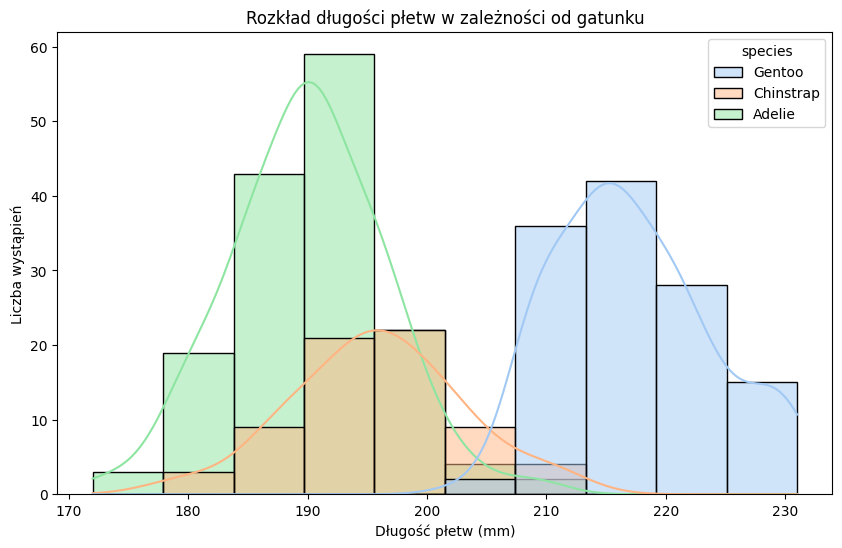

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', kde=True, palette='pastel')
plt.title('Rozkład długości płetw w zależności od gatunku')
plt.xlabel('Długość płetw (mm)')
plt.ylabel('Liczba wystąpień')
plt.show()

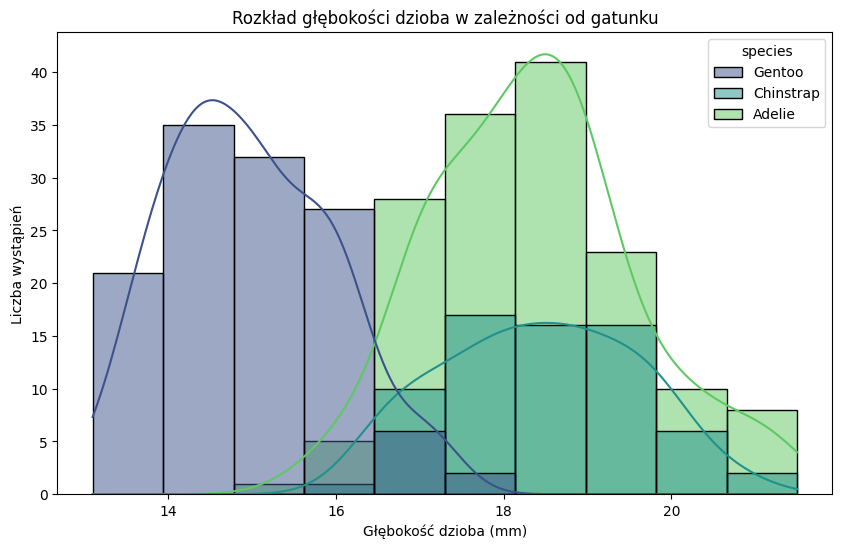

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='culmen_depth_mm', hue='species', kde=True, palette='viridis')
plt.title('Rozkład głębokości dzioba w zależności od gatunku')
plt.xlabel('Głębokość dzioba (mm)')
plt.ylabel('Liczba wystąpień')
plt.show()

<Figure size 1000x600 with 0 Axes>

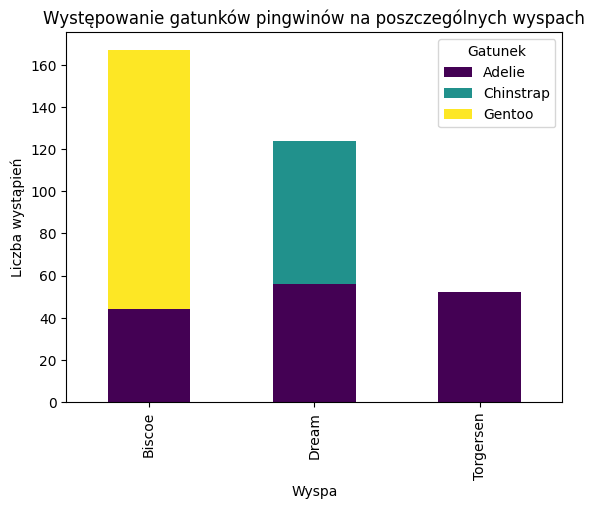

In [69]:
island_species_counts = penguins.groupby(['island', 'species']).size().unstack()

plt.figure(figsize=(10, 6))
island_species_counts.plot(kind='bar', stacked=True, colormap='viridis')


plt.title('Występowanie gatunków pingwinów na poszczególnych wyspach')
plt.xlabel('Wyspa')
plt.ylabel('Liczba wystąpień')
plt.legend(title='Gatunek')

plt.show()

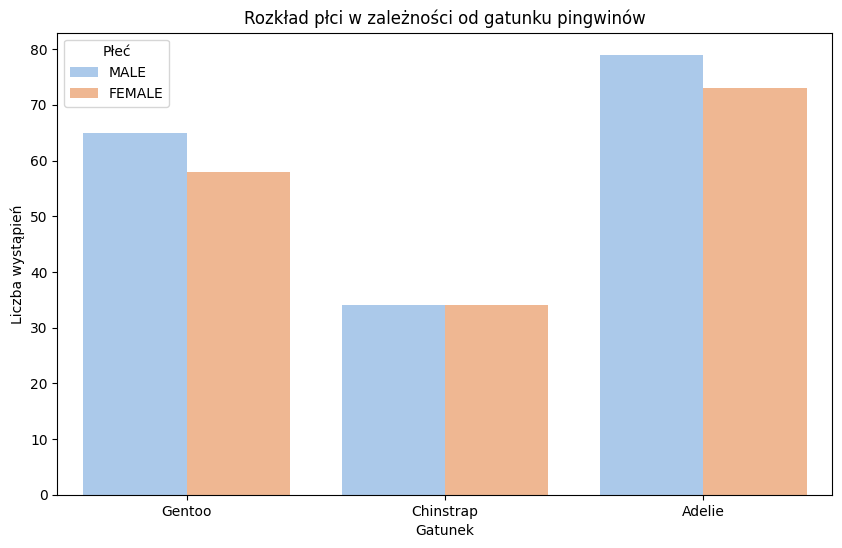

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins, x='species', hue='sex', palette='pastel')


plt.title('Rozkład płci w zależności od gatunku pingwinów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba wystąpień')
plt.legend(title='Płeć')


plt.show()

# Algorytm KNeighborsClassifier

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# zamiana danych na wartości liczbowe
le = LabelEncoder()
penguins['sex'] = le.fit_transform(penguins['sex'])
penguins['island'] = le.fit_transform(penguins['island'])
penguins['species'] = le.fit_transform(penguins['species'])


# normalizacja danych
scaler = StandardScaler()
X = scaler.fit_transform(penguins.drop('species', axis=1))
y = penguins['species']

# podzial na dane testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# trenowanie modelu
neigh = KNeighborsClassifier(n_neighbors = 50)
neigh.fit(X_train, y_train)


# jakość
y_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9855072463768116
Precision: 0.9859601449275363
Recall: 0.9855072463768116
F1 Score: 0.9853072083695902


# Porównanie jakości w zależności od parametru

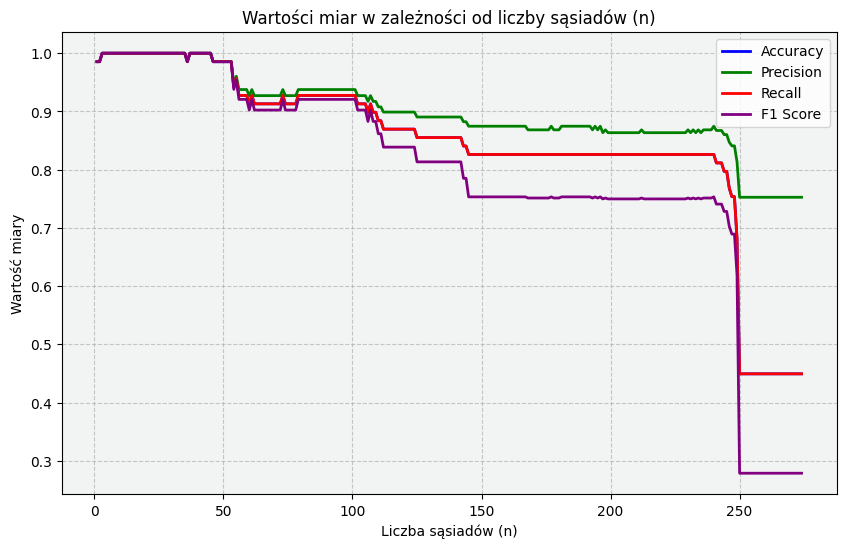

In [87]:
#ilość możliwych sąsiadów
n_values = list(range(1, len(X_train)+1))
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []


# sprawdzenie jakości modelu w zależności od ilości sąsiadów
for n in n_values:
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    precision_values.append(precision)

    recall = recall_score(y_test, y_pred, average='weighted')
    recall_values.append(recall)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_values.append(f1)


# Wyświetlenie wyników na wykresie
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracy_values, label='Accuracy', linestyle='-', color='b', linewidth=2)
plt.plot(n_values, precision_values, label='Precision', linestyle='-', color='g', linewidth=2)
plt.plot(n_values, recall_values, label='Recall', linestyle='-', color='r', linewidth=2)
plt.plot(n_values, f1_values, label='F1 Score', linestyle='-', color='purple', linewidth=2)

plt.title('Wartości miar w zależności od liczby sąsiadów (n)')
plt.xlabel('Liczba sąsiadów (n)')
plt.ylabel('Wartość miary')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#F2F4F4')
plt.show()

# Model SVM i dokładność w zależności od rodzaju kernela

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel_type in kernel_list:
    # inicjalizacja i trenowanie modelu
    model_svm = SVC(kernel=kernel_type)
    model_svm.fit(X_train, y_train)

    # przewidywanie na zbiorze treningowym i testowym
    y_train_pred = model_svm.predict(X_train)
    y_test_pred = model_svm.predict(X_test)

    # ocena jakości
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    precision_test = precision_score(y_test, y_test_pred, average='weighted')

    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')

    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print("Kernel:", kernel_type)
    print("Train Accuracy:", accuracy_train, " Test Accuracy:", accuracy_test)
    print("Train Precision:", precision_train, " Test Precision:", precision_test)
    print("Train Recall:", recall_train, " Test Recall:", recall_test)
    print("Train F1 Score:", f1_train, " Test F1 Score:", f1_test)
    print("\n")


Kernel: linear
Train Accuracy: 0.9927007299270073  Test Accuracy: 1.0
Train Precision: 0.9928194172452672  Test Precision: 1.0
Train Recall: 0.9927007299270073  Test Recall: 1.0
Train F1 Score: 0.9926642879676266  Test F1 Score: 1.0


Kernel: poly
Train Accuracy: 0.9927007299270073  Test Accuracy: 1.0
Train Precision: 0.9928194172452672  Test Precision: 1.0
Train Recall: 0.9927007299270073  Test Recall: 1.0
Train F1 Score: 0.9926642879676266  Test F1 Score: 1.0


Kernel: rbf
Train Accuracy: 0.9927007299270073  Test Accuracy: 1.0
Train Precision: 0.9928194172452672  Test Precision: 1.0
Train Recall: 0.9927007299270073  Test Recall: 1.0
Train F1 Score: 0.9926642879676266  Test F1 Score: 1.0


Kernel: sigmoid
Train Accuracy: 0.9854014598540146  Test Accuracy: 0.9855072463768116
Train Precision: 0.9854443191633863  Test Precision: 0.9859601449275363
Train Recall: 0.9854014598540146  Test Recall: 0.9855072463768116
Train F1 Score: 0.9853285759352528  Test F1 Score: 0.9853072083695902




# Model DecisionTreeClassifier i znalezienie najbardziej optymalnych parametrów

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

# słownik z parametrami
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# inicjalizacja GridSearchCV
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

# trenowanie modelu
grid.fit(X_train, y_train)

# znaalezienie najlepszych parametrow
best_params = grid.best_params_
print("Best Parameters:", best_params)

# trenowanie modelu dla najlepszych parametrow
best_model = grid.best_estimator_

# ocena jakosci modelu dla najlepszych parametrow
test_predictions = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions, average='weighted')
recall_test = recall_score(y_test, test_predictions, average='weighted')
f1_test = f1_score(y_test, test_predictions, average='weighted')

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9855072463768116
Test Precision: 0.9860440150295223
Test Recall: 0.9855072463768116
Test F1 Score: 0.9855251774051113
